<a href="https://colab.research.google.com/github/roapple10/Kmeans/blob/master/R_%E8%AA%9E%E8%A8%80_k%E5%9D%87%E5%80%BC%E5%88%86%E9%A1%9E_(The_k_Means_Clustering)_Steve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
iris2 <- iris

# 首先，我們從數據中刪除物種進行分類。 why?
iris2$Species <- NULL
head(iris2)  

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [ ]:
#預測分群結果與叢集中心
(kmeans.result <- kmeans(iris2, 3))

K-means clustering with 3 clusters of sizes 96, 21, 33

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.314583    2.895833     4.973958   1.7031250
2     4.738095    2.904762     1.790476   0.3523810
3     5.175758    3.624242     1.472727   0.2727273

Clustering vector:
  [1] 3 2 2 2 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 2 2 3 3 3 2 3 3
 [38] 3 2 3 3 2 2 3 3 2 3 2 3 3 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 118.651875  17.669524   6.432121
 (between_SS / total_SS =  79.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [ ]:
names(kmeans.result)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [ ]:
kmeans.result$cluster

[1] 3 2 2 2 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 2 2 3 3 3 2 3 3
 [38] 3 2 3 3 2 2 3 3 2 3 2 3 3 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

In [ ]:
# 然後將聚類結果與品種（Species）進行比較以檢查是否相似對像被分組在一起。
table(iris$Species, kmeans.result$cluster)

            
              1  2  3
  setosa      0 17 33
  versicolor 46  4  0
  virginica  50  0  0

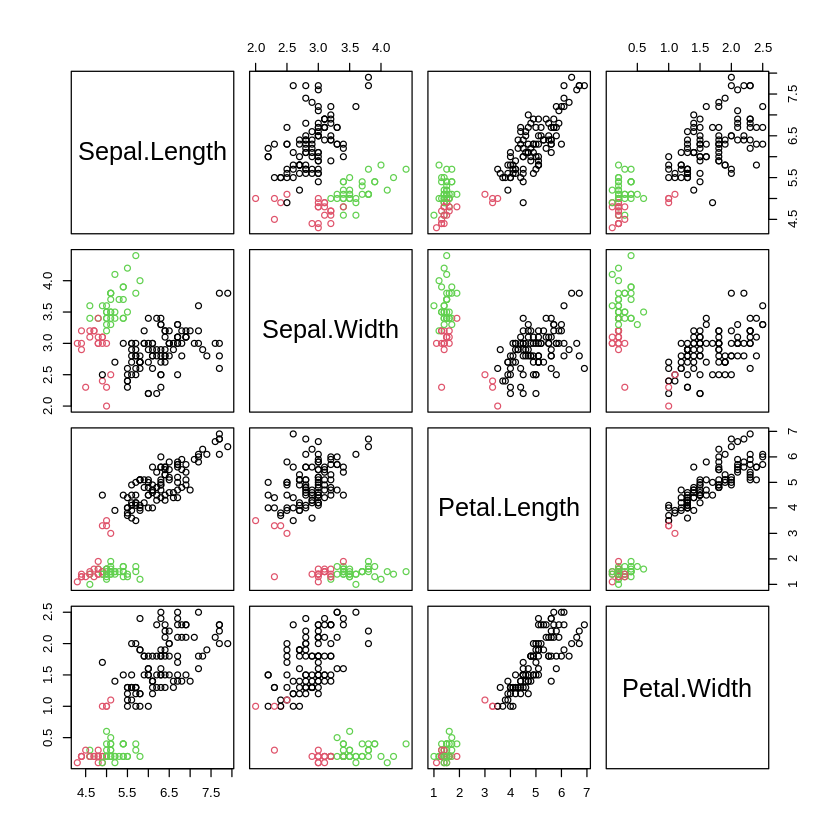

In [ ]:
# 圖 iris的散佈圖矩陣
plot(iris2,col=kmeans.result$cluster)

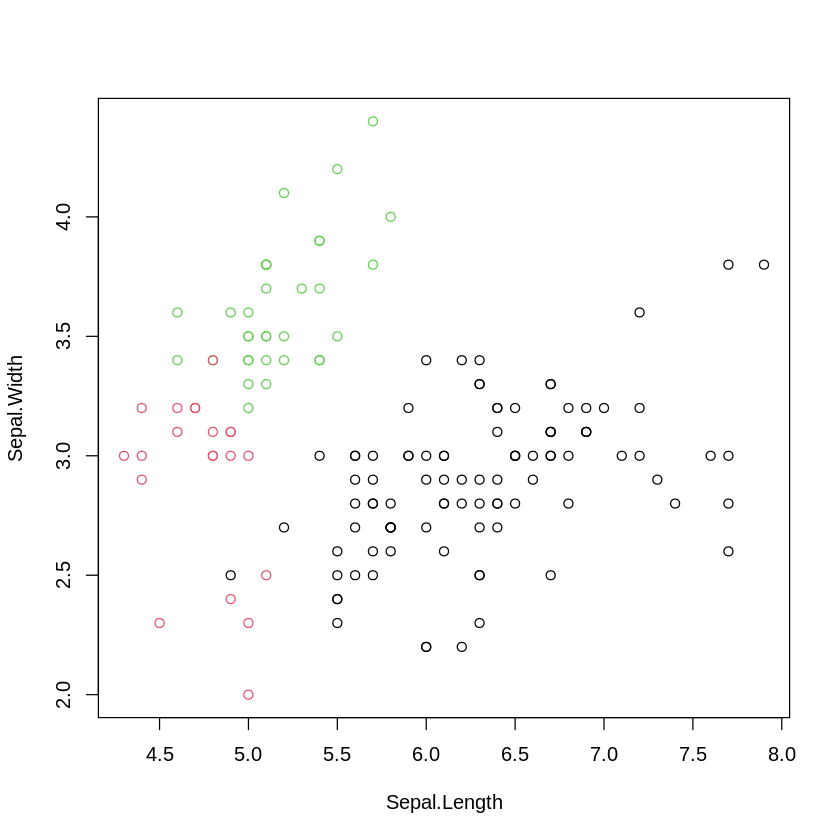

In [ ]:
# 3.0 繪製聚類及其中心圖 -------------- 
# 請注意，有四個數據中的尺寸，只有前兩個尺寸用於繪製下面的圖。
# 靠近綠色中心的一些黑點（星號）實際上更接近黑色中心
# 四維空間。 我們還需要知道，k均值聚類的結果可能會有所不同
# 從運行到運行，由於隨機選擇初始聚類中心。

plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster)

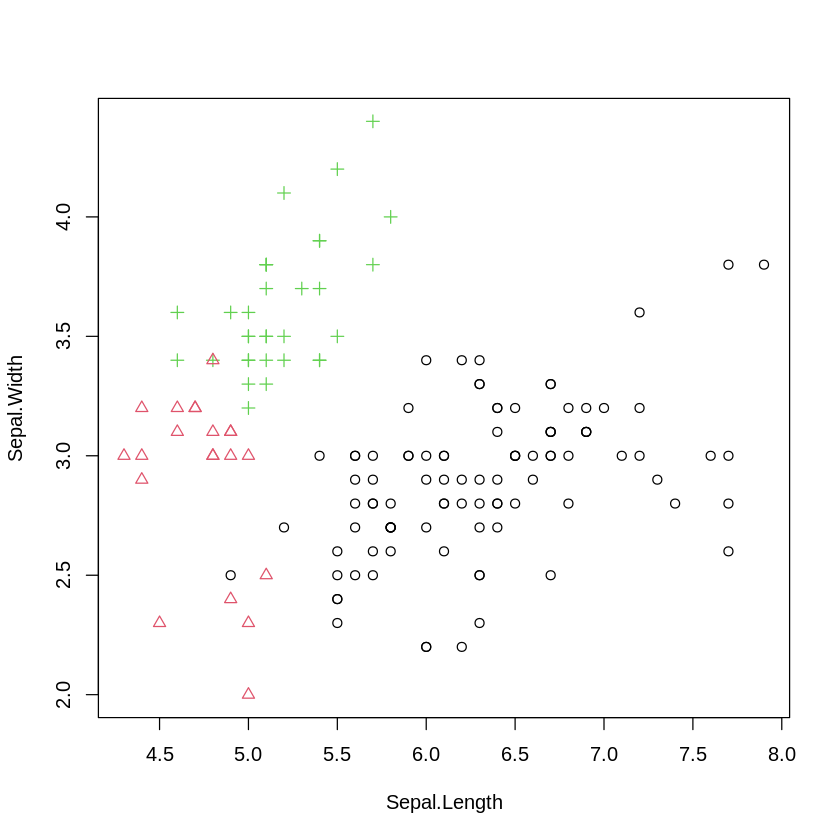

In [ ]:
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster,
     pch = kmeans.result$cluster)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,6.314583,2.895833,4.973958,1.7031250
2,4.738095,2.904762,1.790476,0.3523810
3,5.175758,3.624242,1.472727,0.2727273


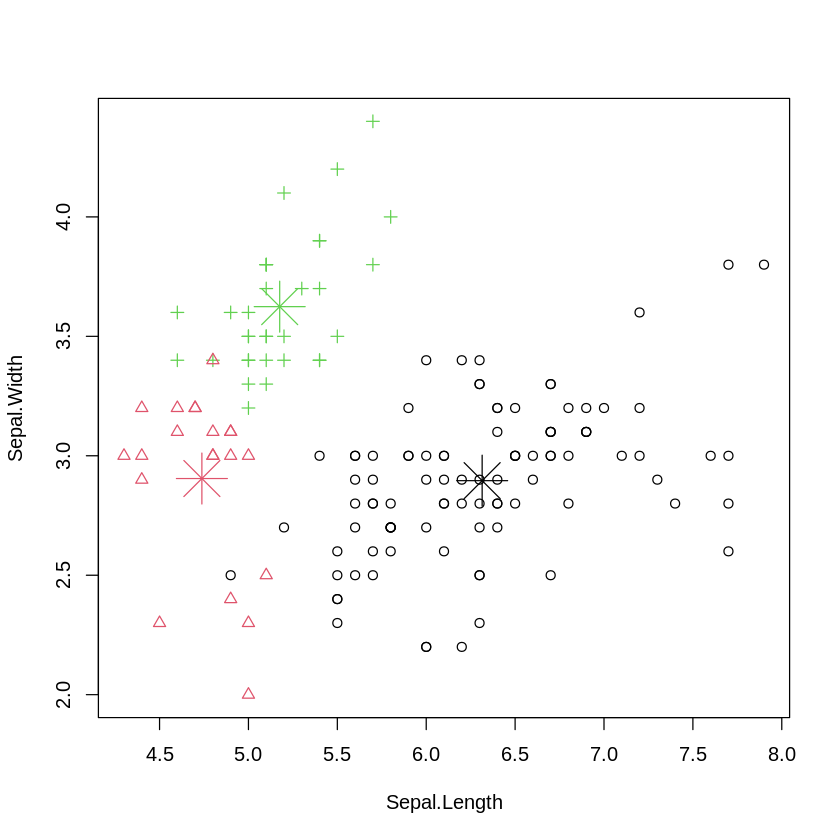

In [ ]:
# plot cluster centers 繪製聚類及其中心點
kmeans.result$centers
#   Sepal.Length Sepal.Width Petal.Length Petal.Width
# 1     6.850000    3.073684     5.742105    2.071053
# 2     5.901613    2.748387     4.393548    1.433871
# 3     5.006000    3.428000     1.462000    0.246000
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster,
     pch = kmeans.result$cluster)
points(kmeans.result$centers[ ,c("Sepal.Length", "Sepal.Width")], col = 1:3, pch = 8, cex=4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,6.314583,2.895833,4.973958,1.7031250
2,4.738095,2.904762,1.790476,0.3523810
3,5.175758,3.624242,1.472727,0.2727273


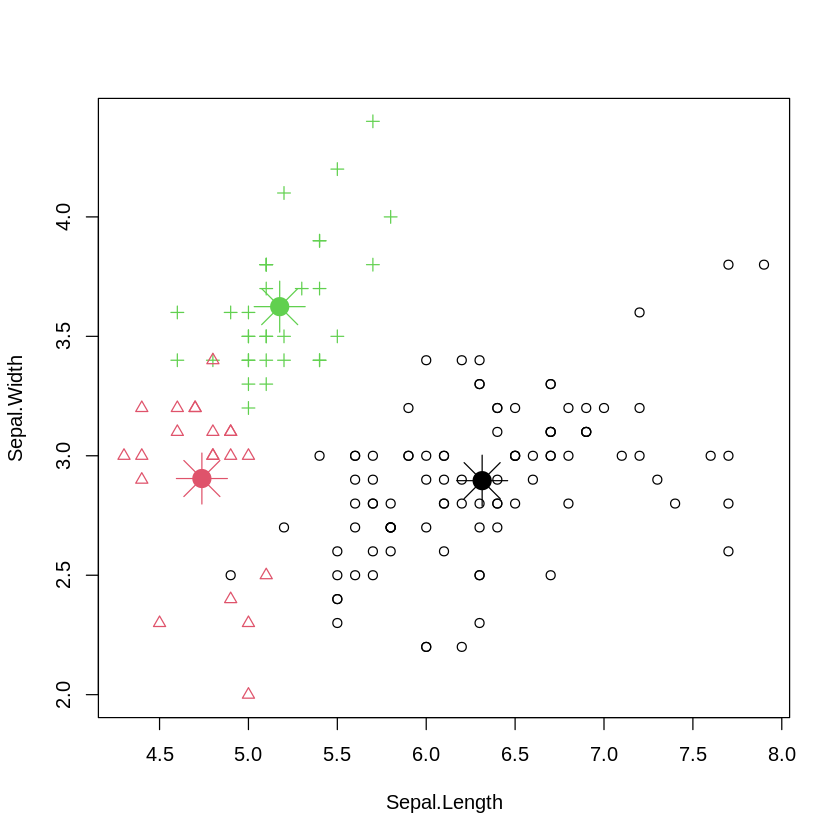

In [ ]:
# plot cluster centers 繪製聚類及其中心點
kmeans.result$centers
#   Sepal.Length Sepal.Width Petal.Length Petal.Width
# 1     6.850000    3.073684     5.742105    2.071053
# 2     5.901613    2.748387     4.393548    1.433871
# 3     5.006000    3.428000     1.462000    0.246000
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster,
     pch = kmeans.result$cluster)
points(kmeans.result$centers[ ,c("Sepal.Length", "Sepal.Width")], col = 1:3, pch = 8, cex=4)
points(kmeans.result$centers[ ,c("Sepal.Length", "Sepal.Width")], col = 1:3,
             pch = 19, cex=2)